In [2]:
import numpy as np 
import matplotlib.pyplot as plt


## Exercise 1. 
Consider a diagram made up of four parts, where in each part we have points in R2, P = (x,y), connected with a line in the order of the arrows



In [3]:
#Here we have all the Parts : 
def Parts (x , a):
    '''
    Parameters 
    x: integer : The part index 1,2,3 or 4
    a: float :  matrix component value 
    
    '''
    
    if (x == 1):
        Part1 = np.matrix([
        [a, a], # first 
        [a, -a], # second
        [-a, -a], # third
        [-a, a],
        [a, a]# back to first
        ])
        return Part1 
    elif (x == 2):
        Part2 = np.matrix([
        [1-a, a-1], # first 
        [-a/4, a-1], # second
        [-a/4, a/2], # third
        [1-a, a/2],
        [1-a, a-1]# back to first
        ])
        return Part2
    elif (x == 3): 
        Part3 = np.matrix([
        [a/4, a-1], # first 
        [a-1, a/2], # second
        [a-1, a-1], # third
        [a/4, a/2],
        ])
        return Part3
    elif (x == 4):
        Part4 = np.matrix([
        [a-1, -a/4], # first 
        [a-1, -a/2], # second
        [1-a, -a/2], # third
        [1-a, -a/4],
        ])
        return Part4 
    else :
        print("Wrong Part Number Entered")
        return None



In [4]:
# The following lines import the packages for drawing polygons
from matplotlib.path import Path
import matplotlib.patches as patches

def draw_polygon(vertices, codes, ax, color="green"):
    path = Path(vertices, codes)
    patch = patches.PathPatch(path, lw=2, fill = False, color = color)
    ax.add_patch(patch)

Choose the part of the exercise you would like to see the answer to
- Part 1: (a,a) → (a,−a) → (−a,−a) → (−a,a) → (a,a).
- Part2: (1−a,a−1)→(−a/4,a−1)→(−a/4,a/2)→(1−a,a/2)→(1−a,a−1). 
- Part3: (a/4,a−1)→(a−1,a/2), then (a−1,a−1)→(a/4,a/2).
- Part4: (a−1,−a/4)→(a−1,−a/2)→(1−a,−a/2)→(1−a,−a/4).

In [5]:
def graph_lines(P,Part):
    # matrix containing all vertices for drawing the triangle 

    if P == 1 or P == 2  : 
        codes = [Path.MOVETO,
                Path.LINETO,
                Path.LINETO,
                Path.LINETO,
                Path.LINETO
                ]
    elif P == 3 : 
        codes = [Path.MOVETO,
                Path.LINETO,
                Path.MOVETO,
                Path.LINETO
        ]
    
    elif P == 4 : 
        codes = [Path.MOVETO,
                Path.LINETO,
                Path.MOVETO,
                Path.LINETO
        ]
    else : 
        print("Needs a Check")


In [6]:
# choose a part : 1 , 2, 3, 4 
P = 4
Part = Parts(P , 5) #change parts and size here !!
codes = graph_lines(P,Part)  # matrix containing all vertices for drawing the triangle 

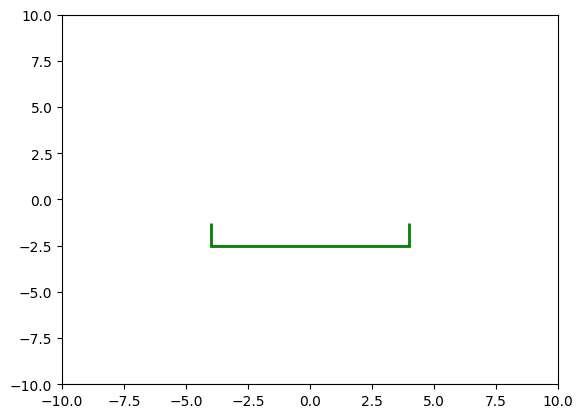

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
draw_polygon(Part,codes,ax)
plt.show() 

Let A be a matrix defined by

$A =\frac{1}{b}\begin{pmatrix}
b & 1 \\ 
 -1 & 1 
\end{pmatrix}$

In [8]:
def matrix(b):
     # The Division of the 1/b is already performed on the matrix A  
    A = np.array([
    [1 , 1/b] ,
    [-1/b , 1/b]
])
    return A

### a) 
Write a program that performs the transformation of points in Parts 1-4 induced by matrix A.

In [9]:
def transformation(trans_mat, coord):
    transformed =[]
    for c in coord:
        transformed.append(np.matmul(trans_mat,np.transpose(c)))
    # Reshape the matrix of coordinates and convert to numpy array
    transformed = np.reshape(transformed,(-1,2))
    return transformed

    

### (b) 
Let a = 4 and b = 3, run your program and output two figures, a figure showing the diagram produced before the transformation, and a figure showing the diagram after the transformation.

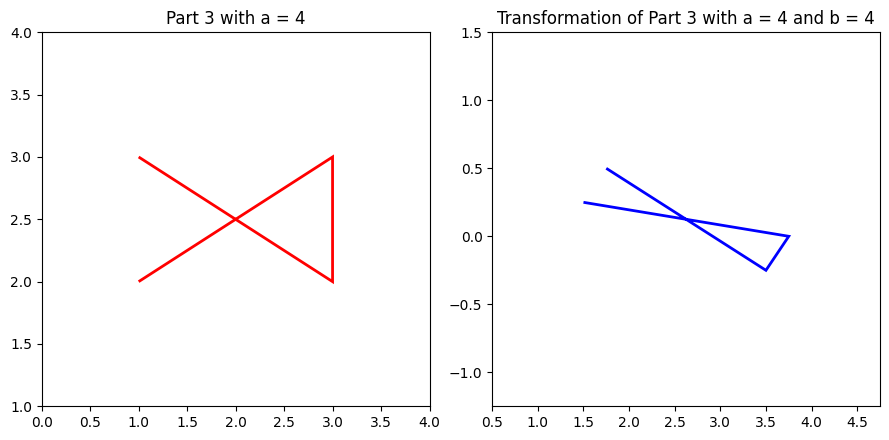

In [10]:
a = 4 # coordinates scaling 
b = 4 # Transformation matrix scaling factor
P = 3 # Part of the question 
Part = Parts(P , a)
transformed = transformation(matrix(b) ,Part)   
codes = graph_lines(P,Part)

fig, axs = plt.subplots(1, 2, figsize=(9, 4.5), tight_layout=True)
axs[0].set_xlim(min(Part[:,0])-1,max(Part[:,0])+1)
axs[0].set_ylim(min(Part[:,1])-1,max(Part[:,1])+1)
axs[0].set_title(f'Part {P} with a = {a}')
draw_polygon(Part,codes,axs[0], 'r')


axs[1].set_xlim(min(transformed[:,0])-1,max(transformed[:,0])+1)
axs[1].set_ylim(min(transformed[:,1])-1,max(transformed[:,1])+1)
axs[1].set_title(f'Transformation of Part {P} with a = {a} and b = {b}')
draw_polygon(transformed,codes,axs[1], 'b')
plt.show() 


## Exercise 2. 
Consider the following initial value problem,

$\frac{dy}{dx}=x+\frac{y}{5}$ , $y(0) =-3$

### (a)
Write a program to apply the Euler’s method to obtain the numerical (approximated) solution, with step sizes of 1, 0.2, and 0.05 on the interval [0, 5], respectively.

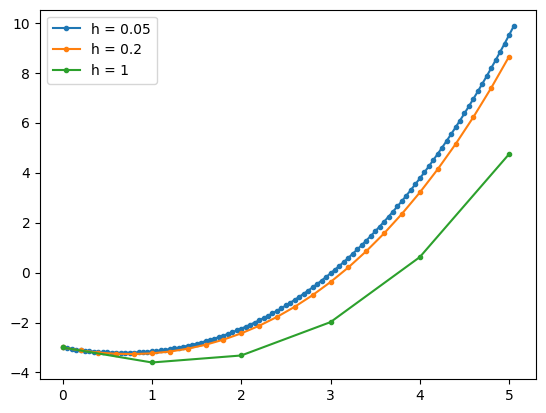

In [11]:
def Euler(h):
    y = []
    x = []
    counter = 0
    x_val = 0
    y_val = -3
    y.append(y_val)
    x.append(x_val)
    
    while x_val <5 :
        counter += 1
        x_val += h
        x.append(x_val) 
        y_prime = x[counter - 1] + y[counter - 1]/5
        y.append(y[counter - 1] + h * y_prime)
        
    return x , y 
     
for h in [0.05,0.2,1]:
    x,y = Euler(h)
    plt.plot(x,y, label = f'h = {h}', marker = ".")
    plt.legend()

### (b)
Work out the analytical (exact) results. Plot figures to compare the numerical results to the analytical results on the interval [0, 5]. Discuss the comparison results.

$\frac{dy}{dx} -\frac{y}{5}=x$

The integrating factor is : $e^{\int -\frac{dx}{5}} = e^{-\frac{x}{5}} $

Therefore we can write the first order differential equation as : 

$e^{-\frac{x}{5}}\frac{dy}{dx} - e^{-\frac{x}{5}}\frac{y}{5}=x e^{-\frac{x}{5}}$

$\frac{d(e^{-\frac{x}{5}} y )}{dx} = x e^{-\frac{x}{5}} \rightarrow e^{-\frac{x}{5}} y  = \int x e^{-\frac{x}{5}} dx  \rightarrow  e^{-\frac{x}{5}} y  = -5 e^{-\frac{x}{5}} (x+5) +c $

Therefore : $y = -5x -25 +c  e^{\frac{x}{5}}$


We then apply the given initial condition in order to find the particular solution to the differential equation :

If $y(0)= -3 \rightarrow -3 = -5(0)-25+c  e^{\frac{(0)}{5}} \rightarrow c=22$ 



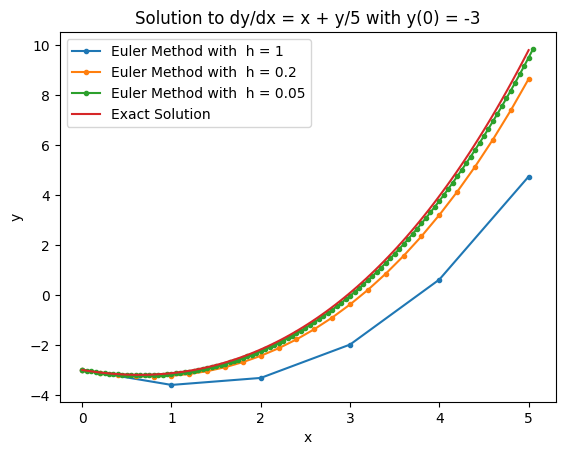

In [27]:
def exact_sol(x):
    y = -5*x - 25 + 22 * np.exp(x/5)
    return y

for h in [1,0.2,0.05]:
    x,y = Euler(h)
    plt.plot(x,y, label = f'Euler Method with  h = {h}', marker = ".")


x = np.linspace(0,5,100)
plt.plot(x, exact_sol(np.array(x)), label='Exact Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution to dy/dx = x + y/5 with y(0) = -3')
plt.legend()
plt.show()

This shows that the smaller the $h$ is in Euler's method, the closer the numerical solution is to the analytical solution 